In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import the pakeges

In [2]:
data = pd.read_csv("Community.csv")
#load the data

In [3]:
data

,Unnamed: 0,Title,Url,Time,Content
0,0,How Tory leadership race can lead to every Bri...,https://www.thesun.co.uk/https://www.thesun.co...,"22nd May 2019, 12:28 am",BIG moments in history need big ideas.No one c...
1,1,Xbox chief welcomes legal game regulation move...,https://www.thesun.co.uk/https://www.thesun.co...,"20th May 2019, 5:11 pm",NEW laws and regulations around video games mi...
2,2,Vincent Kompany becomes player manager of Ande...,https://www.thesun.co.uk/https://www.thesun.co...,"19th May 2019, 11:05 am",VINCENT KOMPANY has been appointed as the new ...
3,3,Stephen Fry jokes ‘answer that or I’ll kill yo...,https://www.thesun.co.uk/https://www.thesun.co...,"18th May 2019, 11:02 am","STEPHEN Fry joked that he would ""kill"" an audi..."
4,4,"Ellie Gould, 17, died from stab wounds, police...",https://www.thesun.co.uk/https://www.thesun.co...,"7th May 2019, 1:00 pm",A TEEN boy has today appeared in court charged...
5,5,Oldham council boss says Farage ‘spent the who...,https://www.thesun.co.uk/https://www.thesun.co...,"29th April 2019, 12:13 pm",NIGEL Farage has sparked a furious backlash af...
6,6,"Woman, 21, ‘too embarrassed to look in the mir...",https://www.thesun.co.uk/https://www.thesun.co...,"27th April 2019, 3:28 pm",A WOMAN who suffers from an all-over body rash...
7,7,Prince Harry and Meghan Markle’s move to Afric...,https://www.thesun.co.uk/https://www.thesun.co...,"22nd April 2019, 3:50 pm",MEGHAN Markle and Prince Harry’s move could re...
8,8,Meghan Markle and Prince Harry’s shock plan to...,https://www.thesun.co.uk/https://www.thesun.co...,"21st April 2019, 10:30 pm",11PRINCE Harry and Meghan are in talks to move...
9,9,Grand Designs viewers left ‘heartbroken’ when ...,https://www.thesun.co.uk/https://www.thesun.co...,"11th April 2019, 10:00 pm",A COUPLE who dreamt of going back to nature sp...


In [4]:
import calendar

In [5]:
neg = {}
pos = {}
neu = {}

In [6]:
data['Time'][0].split()[0][:-2]

'22'

In [7]:
for i in range(len(data)):
    time = 0
    try:
        if data['Time'][i] != 'None':
            d1 = data['Time'][i].split()[2][:-1]
            d2 =list(calendar.month_name).index(data['Time'][i].split()[1])
            if int(d2) < 10:
                d2 = '0' + str(d2)
            d3 = data['Time'][i].split()[0][:-2]
            if int(d3) < 10:
                d3 = '0' + str(d3)
            #print(d1,d2,d3)
            data['Time'][i] = int(d1 + str(d2) + str(d3))
    except BaseException:
        pass
        

/home/sunny/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [8]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

for i in range(len(data)):
    ss = sid.polarity_scores(data['Content'][i])
    T = data['Time'][i]
    if T != 'None':
        neg[str(T)] = ss['neg']
        pos[str(T)] = ss['pos']
        neu[str(T)] = ss['neu']
    else:
        neg[str(0)] = ss['neg']
        pos[str(0)] = ss['pos']
        neu[str(0)] = ss['neu']

In [9]:
pos = sorted(pos.items(), key = lambda k:k[0])
neg = sorted(neg.items(), key = lambda k:k[0])
neu = sorted(neu.items(), key = lambda k:k[0])

In [10]:
pos = pos[:-1]
neg = neg[:-1]

In [11]:
def Process(L):
    List = [[],[]]
    stime = int(L[0][0]) // 100 * 100
    ntime = stime + 100
    sum = 0
    count = 0
    for a in L:
        t = int(a[0])
        k = t//100 - stime//100
        if t >= ntime:
            List[0].append(stime/10000)
            List[1].append(sum/count)
            stime = stime + 100*k
            ntime = ntime + 100*k
            count = 0
            sum = 0
        if t >= stime and t <= ntime:
            sum = sum + a[1]
            count = count + 1
    l = {
    'index' : [],
    'time' : [],
    'value' : []
    }
    c = 0
    for i in range(len(List[0]) - 1):
        if List[0][i+1] - List[0][i] != 0.01 and int(List[0][i+1]) == int(List[0][i]):
            n = List[0][i+1]*100 - List[0][i]*100 - 1
            n = int(n)
            if n > 0:
                for j in range(n):
                    c = c + 1
                    l['index'].append(c + i)
                    l['time'].append(List[0][i] + 0.01*(j+1))
                    l['value'].append((List[1][i] + List[1][i+1])/2)
    for i in range(len(l['index'])):
        List[0].insert(l['index'][i],l['time'][i])
        List[1].insert(l['index'][i],l['value'][i])
    return List

In [12]:
Pos = Process(pos)
for i in range(len(Pos[0])):
    Pos[0][i] = str(Pos[0][i])
    if Pos[0][i][-2] == '.':
        Pos[0][i] = Pos[0][i] + '0'
    Pos[0][i] = Pos[0][i][2:]
    if Pos[0][i][-2] == '0':
        Pos[0][i] = Pos[0][i][:-2] + Pos[0][i][-1]

In [13]:
Pos[0][0]

'16.6'

In [14]:
Neg = Process(neg)
for i in range(len(Neg[0])):
    Neg[0][i] = str(Neg[0][i])
Neg[0][0]

'2016.06'

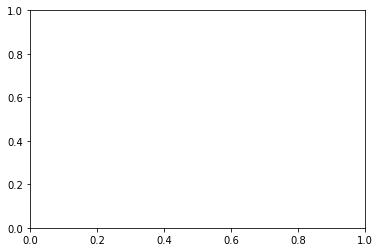

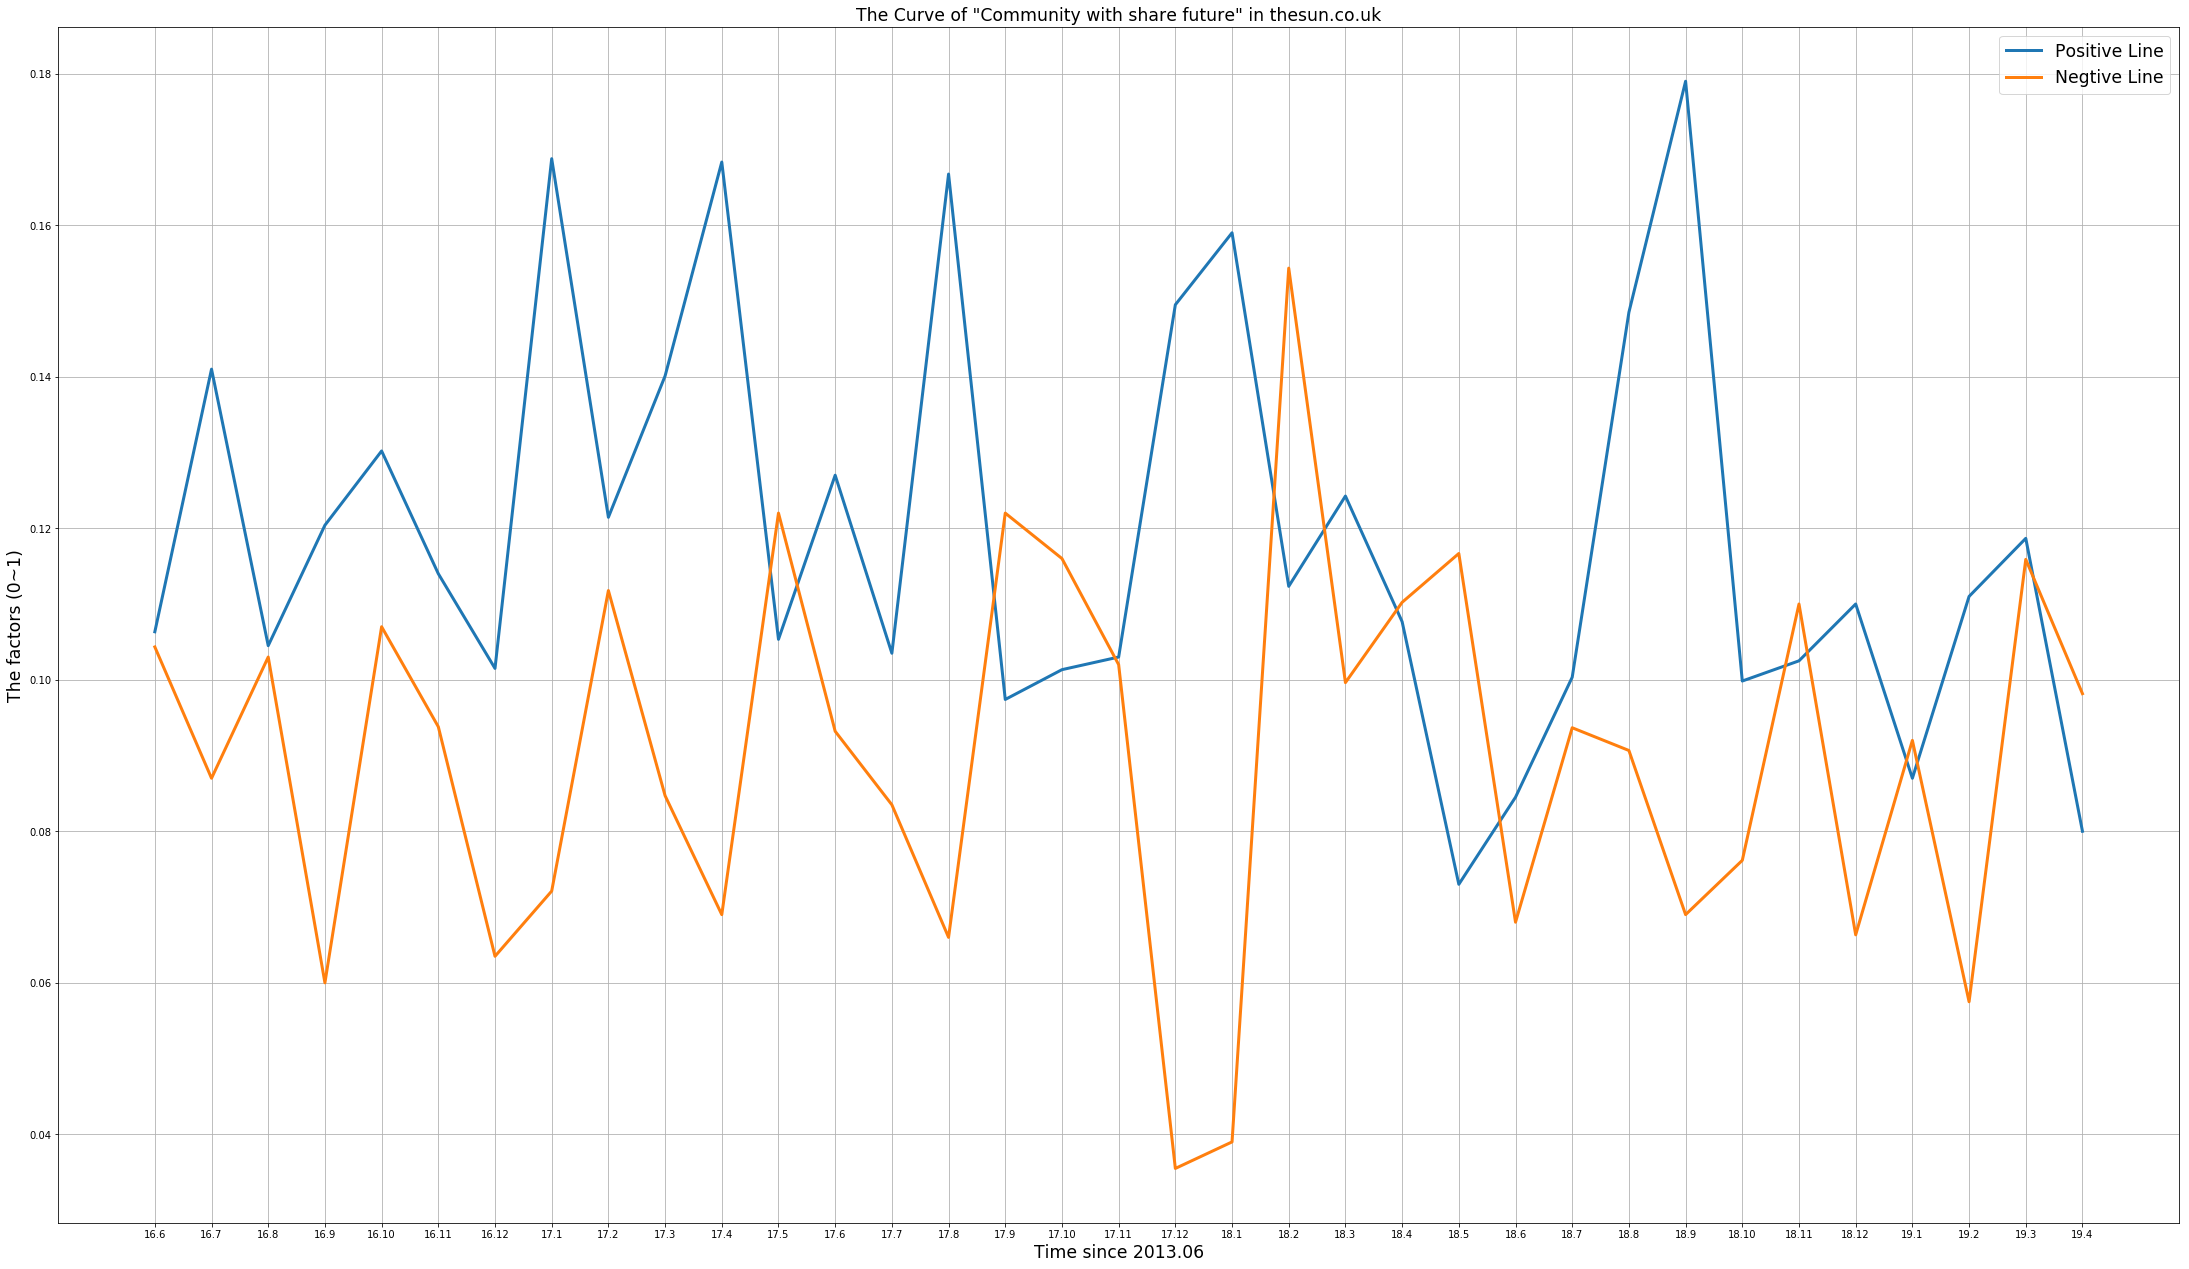

In [15]:
import matplotlib.pyplot as plt
import numpy as np

fig,ax = plt.subplots()
x1 = np.arange(0,len(Pos[0][0:]))
y1 = Pos[1][0:]
x2 = np.arange(0,len(Neg[0][0:]))
y2 = Neg[1][0:]
group_labels = Pos[0][0:]
plt.figure(figsize=(38, 22))
plt.plot(x1,y1,lw = 3)
plt.plot(x2,y2,lw = 3)
plt.legend(['Positive Line','Negtive Line'],fontsize = 'xx-large')
my_x_ticks = np.arange(0, len(Pos[0][0:]))
plt.xticks(my_x_ticks, group_labels, rotation=0)
plt.grid()
plt.title('The Curve of "Community with share future" in thesun.co.uk',fontsize = 'xx-large')
plt.xlabel('Time since 2013.06',fontsize = 'xx-large')
plt.ylabel('The factors (0~1)',fontsize = 'xx-large')
plt.savefig('Community.jpg')
plt.show()

In [16]:
posindex = np.sum(y1)/len(y1)

negindex = np.sum(y2)/len(y2)

posindex,negindex

(0.11908539682539683, 0.09010452380952381)